#<font color='#ff5748'>***Static_model***</font>
---

####<font color='#18A558'>***Libraries***</font>
---

In [ ]:
import time
import math
import random
import hashlib
import warnings
import seaborn as sns
from tqdm import tqdm
import lightgbm as ltb
from scipy import stats
import missingno as msno
from sklearn import metrics
from sklearn.svm import SVC
import plotly.express as px
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd, numpy as np ,re
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
warnings.filterwarnings("ignore")

####<font color='#18A558'>***Functions***</font>
---

In [ ]:
# to read the data set
def readDataSet(DataSet_name, Sheet_Name):    # to read the of these files (csv, xls, xlsx) as a dataframe.
    Extension = re.findall('((.csv)|(.xls)|(.xlsx))', DataSet_name)
    Extension = str(Extension)
    if '.csv' in Extension:
        Extension = '.csv'
    elif '.xls' in Extension:
        Extension = '.xls'
    elif '.xlsx' in Extension:
        Extension = '.xlsx'
    if Extension == ('.xls' or '.xlsx'):
        DataFrame = pd.read_excel(DataSet_name, sheet_name = Sheet_Name)
    elif Extension == '.csv':
        DataFrame = pd.read_csv(DataSet_name)
    return DataFrame

# to plot lines
def Plot(X,Y,Label,Color, Marker , S , Xlabel , Ylabel , Title):
    plt.plot(X, Y, label = Label, c = Color)
    plt.scatter(X,Y, c=Color, marker = Marker , s=S)
    plt.xlabel(Xlabel)
    plt.ylabel(Ylabel)
    plt.title(Title)
    plt.legend()
    return plt

# cm
def ConfusionMatrix(Y_Actual, Y_Pred):
    CF = confusion_matrix(Y_Actual, Y_Pred)
    return CF

# Plot confusion matrix
def PLOT_ConfusionMatrix(CF,Title):
    sns.heatmap(CF, annot=True, fmt='d')
    plt.title(Title, fontsize = 15)
    plt.xlabel('Predicted', fontsize = 15)
    plt.ylabel('Actual', fontsize = 15)
    return plt.show()

# get the each class records in list of lists
def GetListOfClasses(numberOfClasses, DataSet, TargetColumn):
        ls = [None] * numberOfClasses
        for i in range(0,numberOfClasses):
            ls[i] = DataSet.loc[DataSet[TargetColumn] == i]
        return ls

# Plot Data Points
def PlotDataPoints(numberOfClasses,colorsOpt ,ListOFClasses, XLabel, Ylabel ,labels ,S, Title):
    MarkersOptions = ['o']
    
    for i in range(numberOfClasses):
        plt.scatter(x = ListOFClasses[i].iloc[:, 0:1], y = ListOFClasses[i].iloc[:, 1:2], c=colorsOpt[i], marker = MarkersOptions[0], s=S, label = labels[i])

    plt.xlabel(XLabel, fontsize = 15)
    plt.ylabel(Ylabel, fontsize = 15)
    plt.title(Title)
    #plt.legend()
    return plt

####<font color='#18A558'>***Read: static_dataset.csv***</font>
---

In [ ]:
# Upload DataSet to colab
# data = files.upload()

In [ ]:
# or also i can get the data from my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ELG7186[EG]/

/content/drive/MyDrive/ELG7186[EG]


In [ ]:
# read the dataset
data = readDataSet('Static_dataset.csv', 'Static_dataset')

#<font color='#71fff1'>***Data Analysis***</font>
---

In [ ]:
# show sample from the data
data.head(5)

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [ ]:
# basic information about the data
print("the number of the rows is : ", len(data))
print("the number of the columns is : ", len(data.columns))
print("the data type of each column is : ","\n\n", data.dtypes)

the number of the rows is :  268074
the number of the columns is :  16
the data type of each column is :  

 timestamp            object
FQDN_count            int64
subdomain_length      int64
upper                 int64
lower                 int64
numeric               int64
entropy             float64
special               int64
labels                int64
labels_max            int64
labels_average      float64
longest_word         object
sld                  object
len                   int64
subdomain             int64
Target Attack         int64
dtype: object


##<font color='#18A558'>***Data Distribution***</font>
---

100%|██████████| 8/8 [01:15<00:00,  9.42s/it]


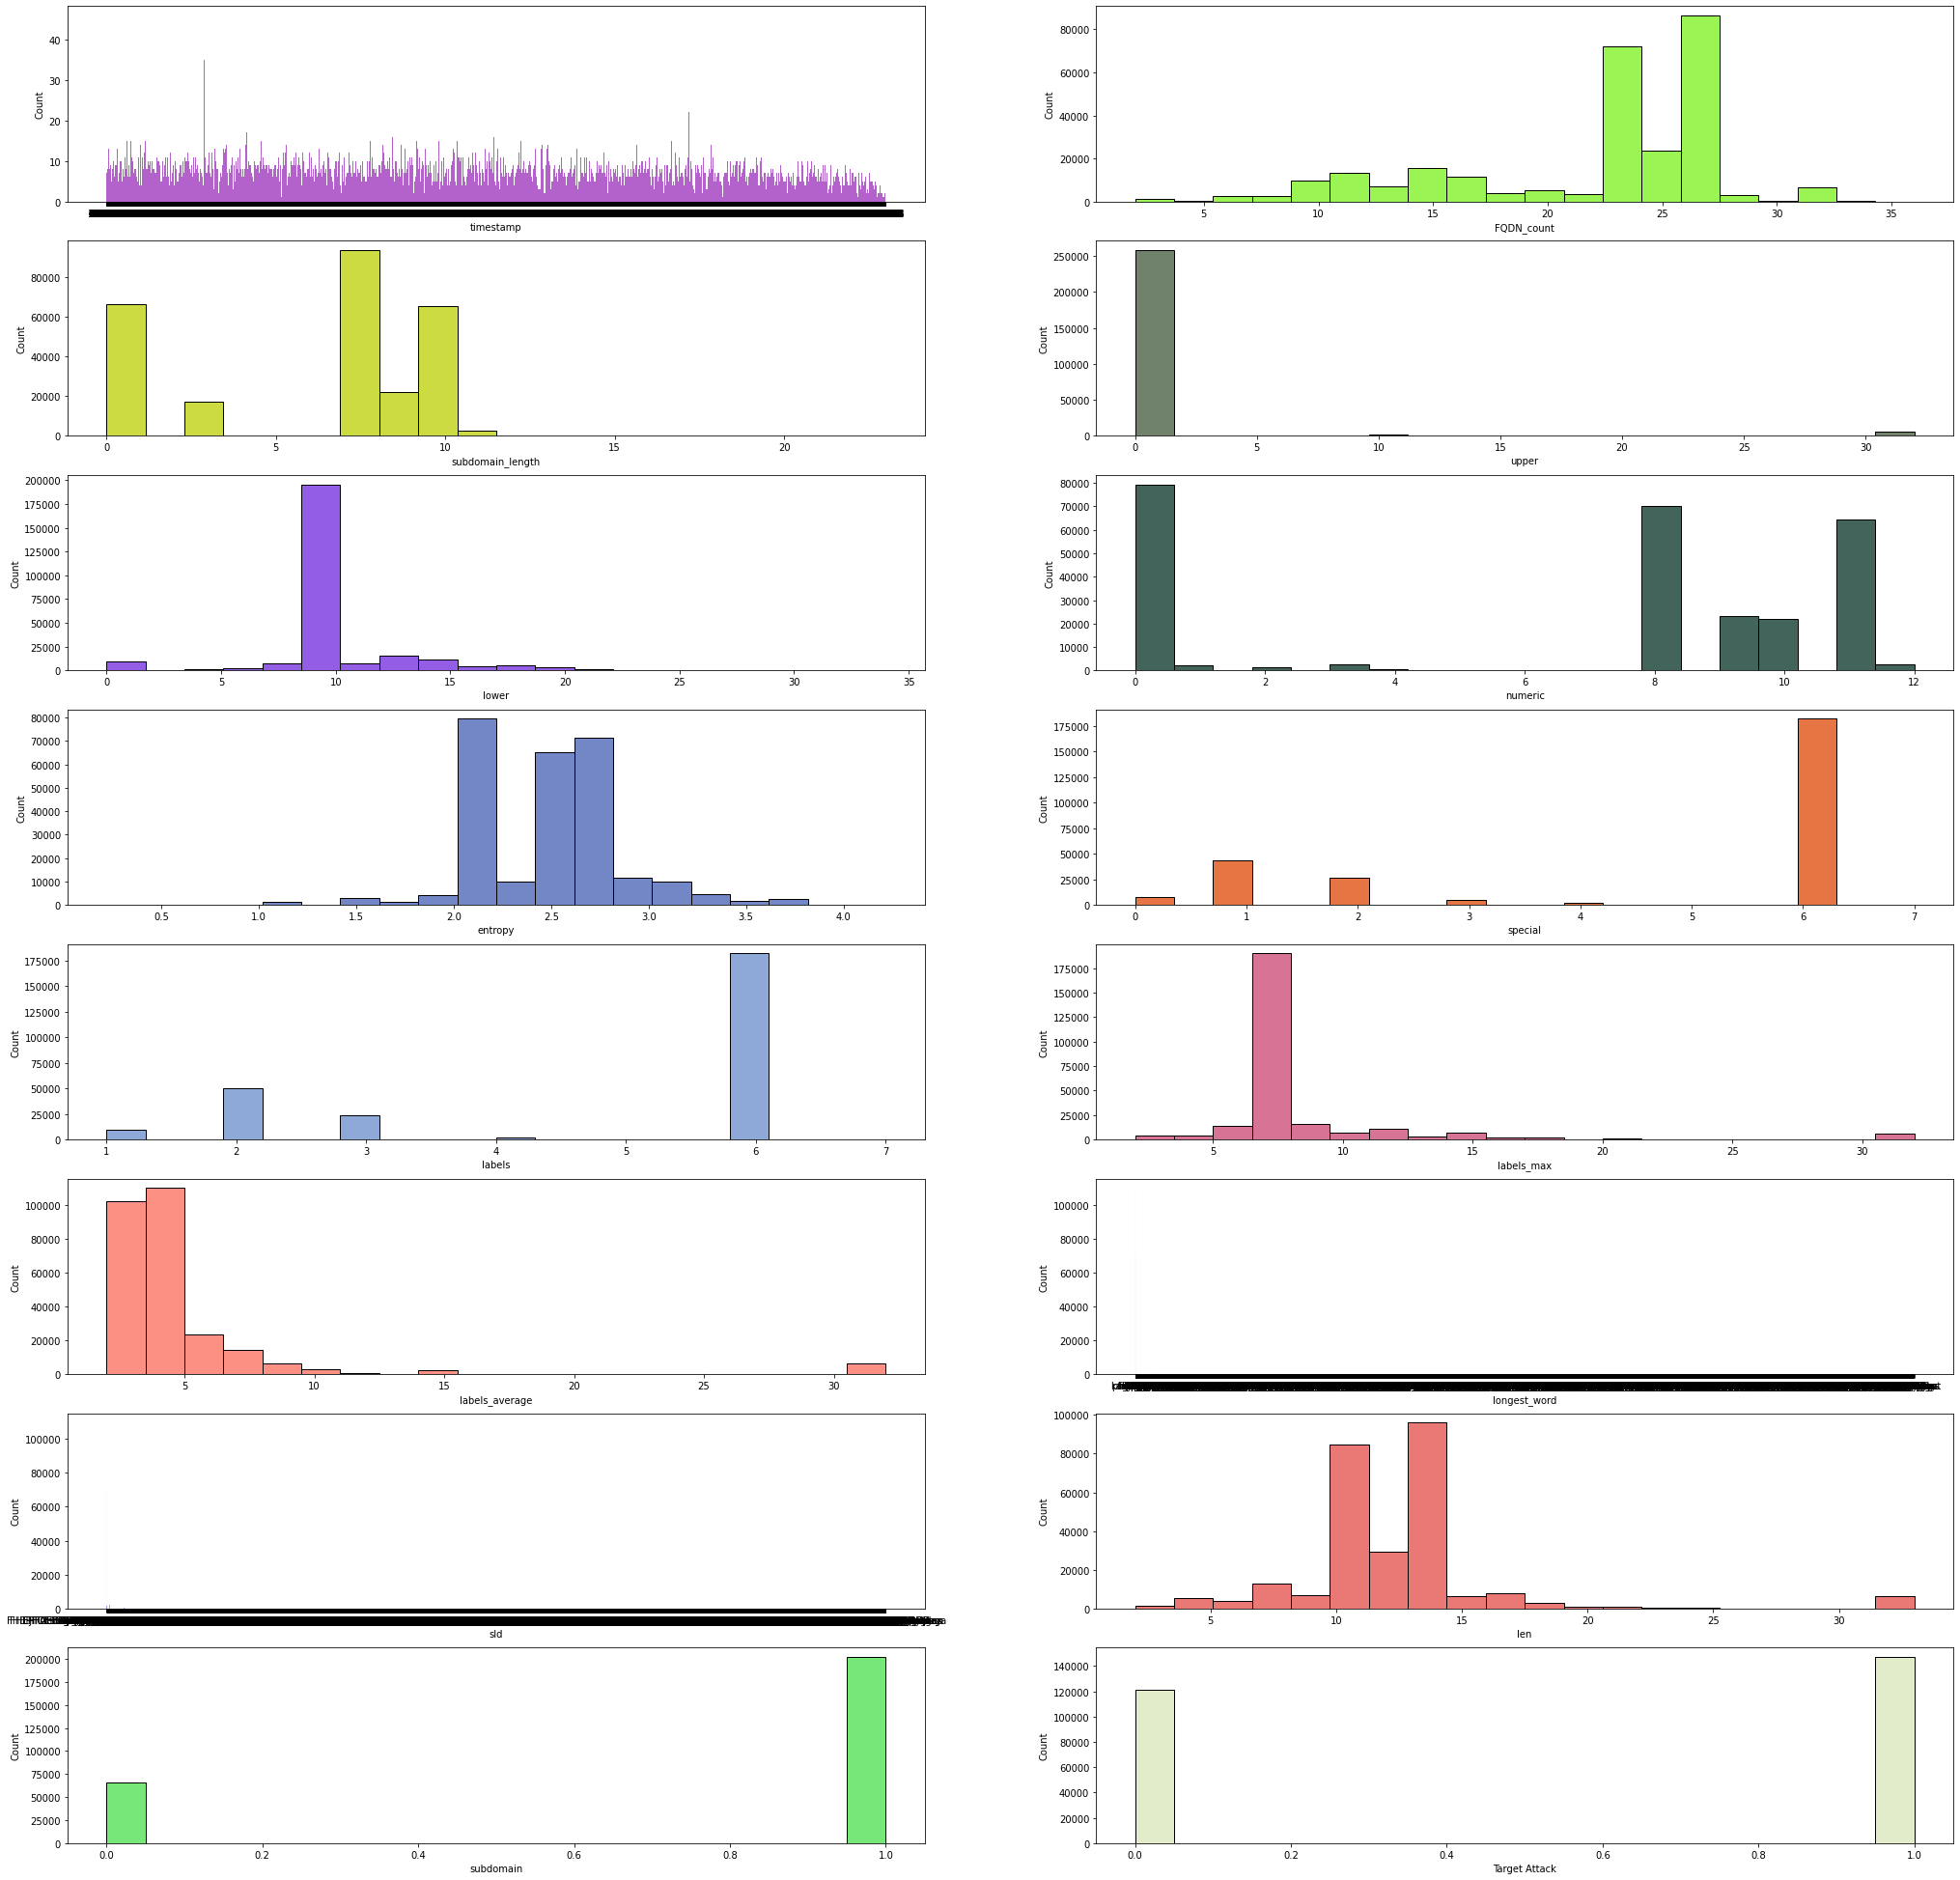

In [ ]:
# Data Distribution
number_of_colors = len(data.columns)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
count = 0
Figure, Axis = plt.subplots(8,2,figsize=(35,35))

for i in tqdm(range(8)):
  for j in tqdm(range(2)):
      sns.histplot(ax = Axis[i,j],x = data.iloc[:,count], color = colors[count], bins=20)
      count = count + 1
      if count>16:
        break
Figure.show()

##<font color='#18A558'>***imbalanced or not***</font>
---

In [ ]:
data["Target Attack"].unique()

array([1, 0])

In [ ]:
fig = px.pie(values=data["Target Attack"].value_counts(),names=["class 0", "class 1"],title="Category of customer")
fig.show()

##<font color='#18A558'>***Statistical analysis***</font>
---

In [ ]:
data.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
count,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000
mean,22.286596,6.059021,0.845420,10.410014,6.497586,2.485735,4.533577,4.788823,8.252233,4.802239,12.576714,0.753497,0.549024
std,6.001205,3.899505,4.941929,3.207725,4.499866,0.407709,2.187683,1.803256,4.415355,4.573066,4.177828,0.430975,0.497592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000
25%,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000,1.000000
max,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,33.000000,1.000000,1.000000


##<font color='#18A558'>***Outliers***</font>
---

100%|██████████| 2/2 [00:00<00:00, 54.54it/s]

100%|██████████| 2/2 [00:00<00:00, 58.34it/s]

100%|██████████| 2/2 [00:00<00:00, 42.90it/s]

100%|██████████| 6/6 [00:00<00:00, 17.51it/s]


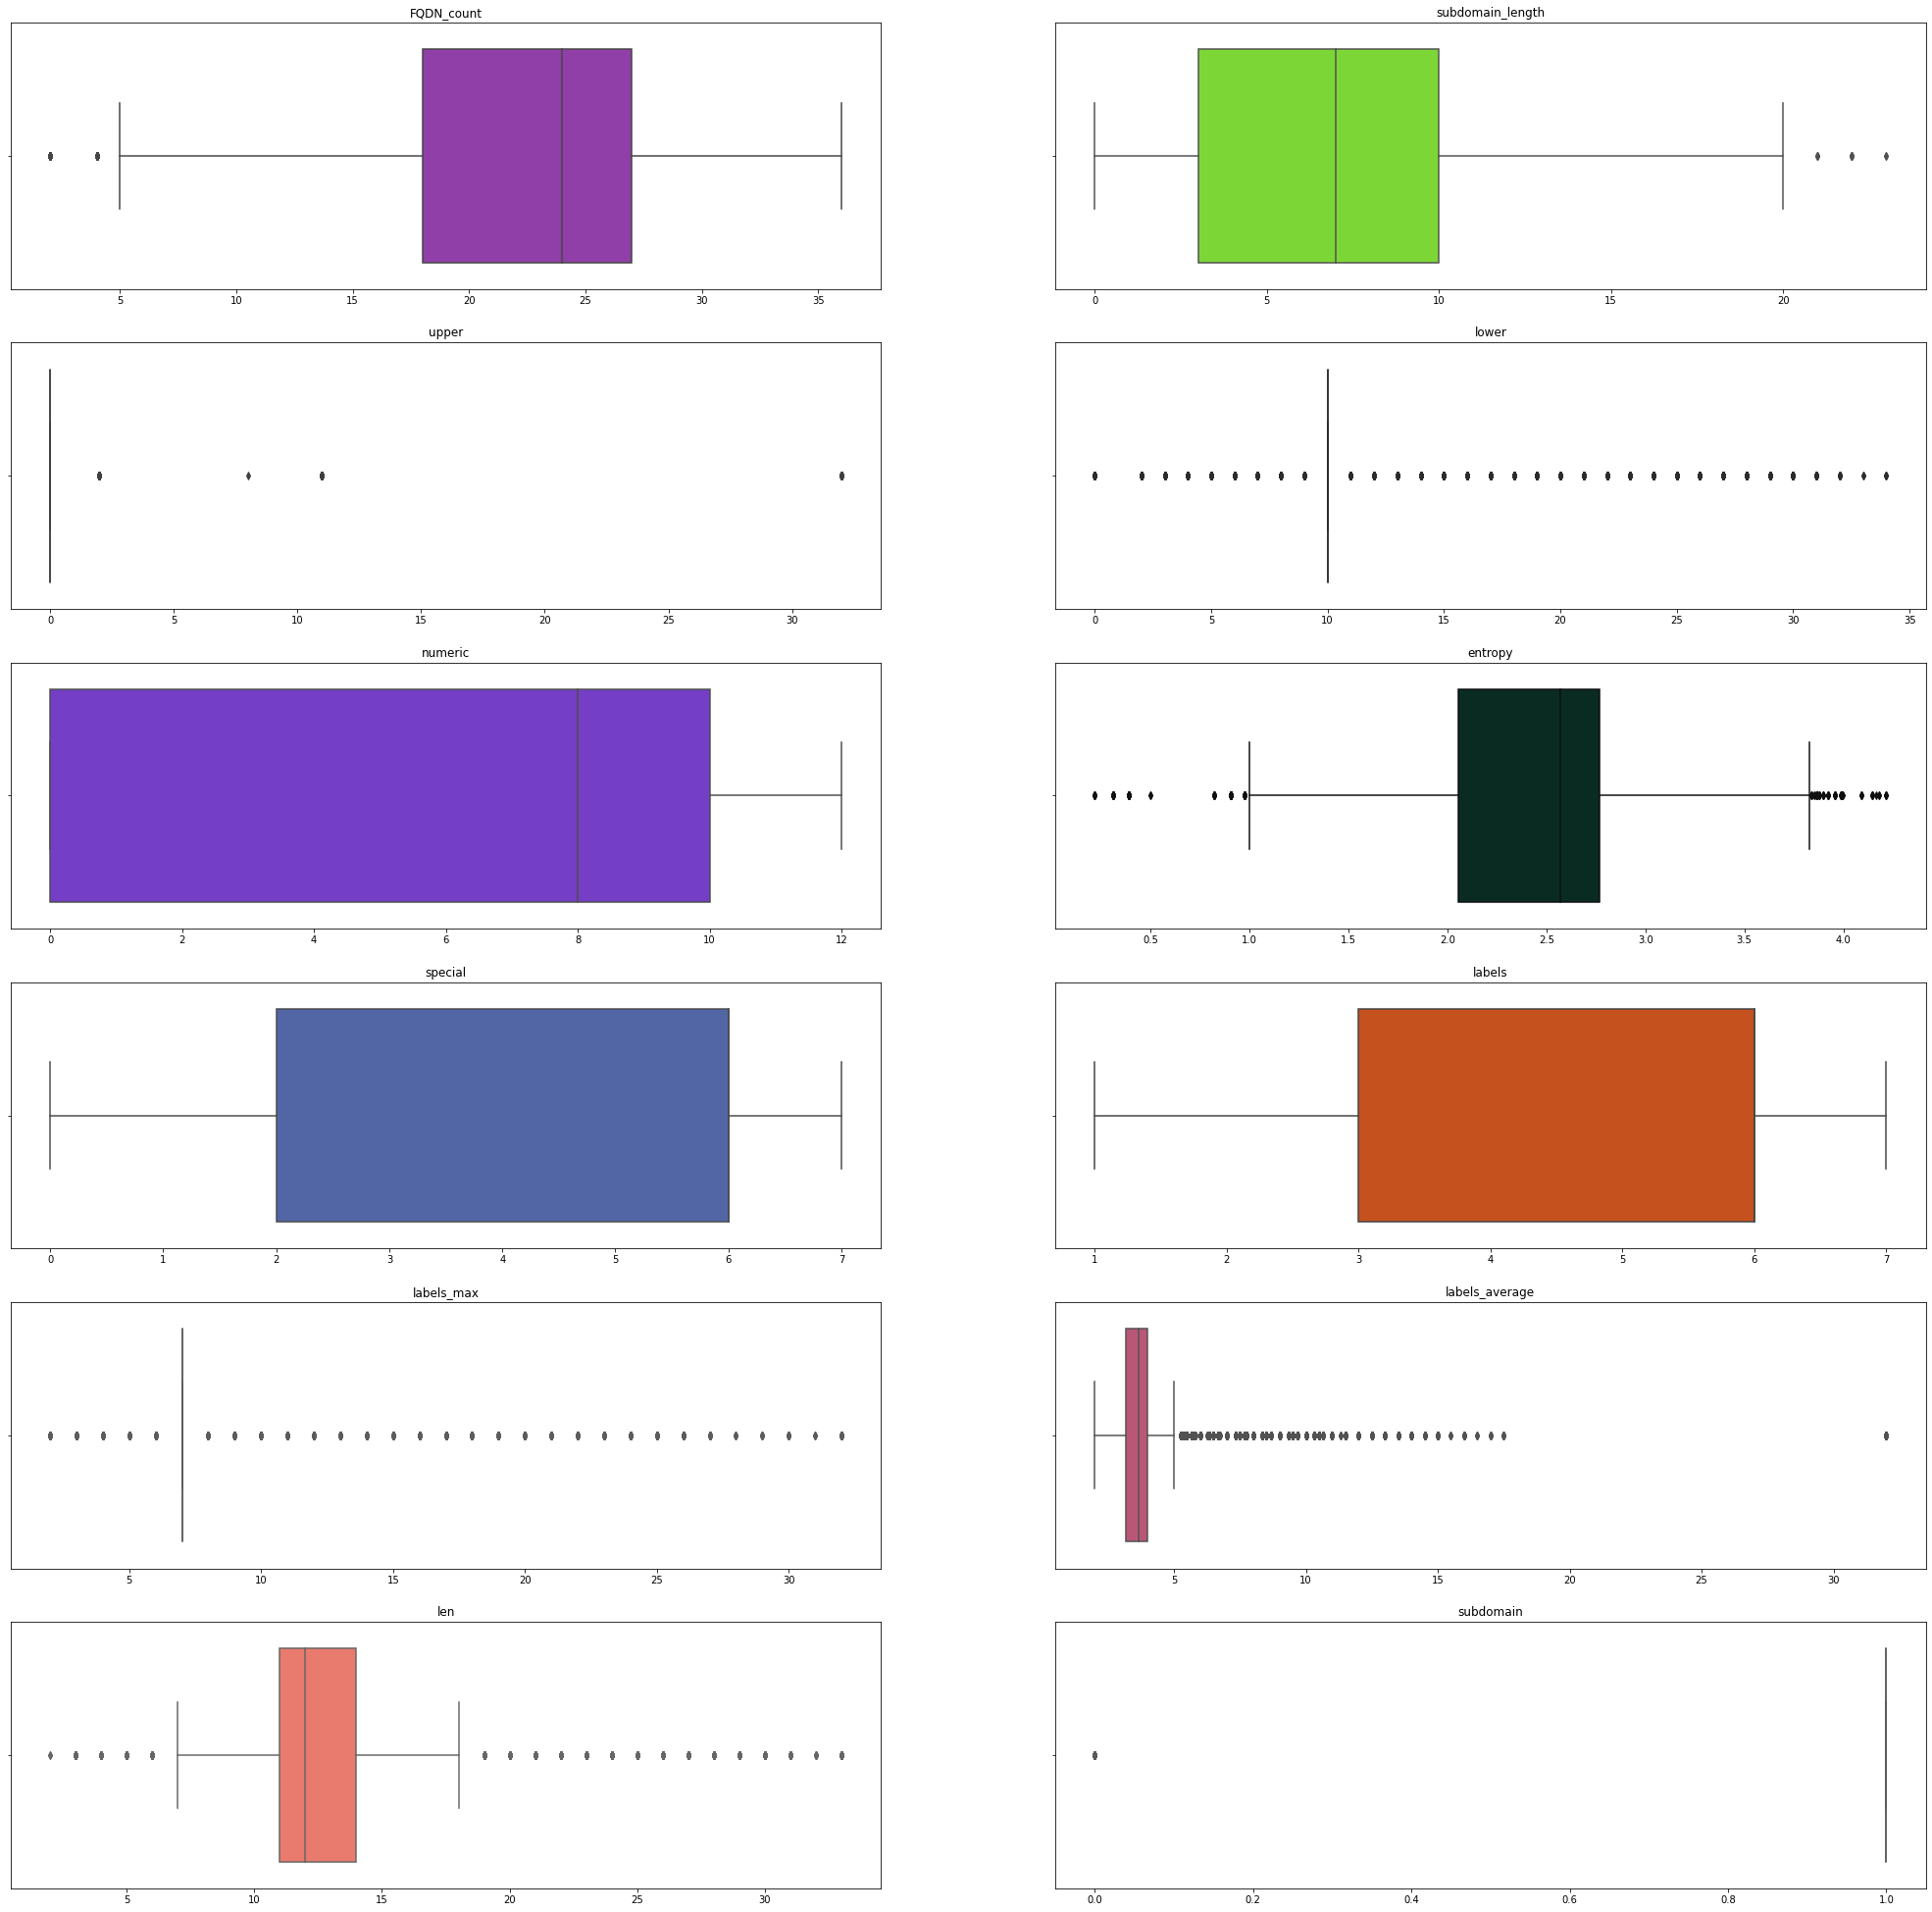

In [ ]:
# Detecting outliers (Box Plot)
count = 0
Figure, Axis = plt.subplots(6,2,figsize=(35,35))
Numeric_Features = data.iloc[:, [1,2,3,4,5,6,7,8,9,10,13,14]]
names = list(Numeric_Features.columns)
for i in tqdm(range(6)):
  for j in tqdm(range(2)):
      sns.boxplot(ax = Axis[i,j],x = Numeric_Features.iloc[:,count].to_numpy(), color = colors[count]).set(title=names[count])
      count = count + 1
      if count>12:
        break
Figure.show()

#<font color='#71fff1'>***Feature engineering and data cleaning***</font>
---

##<font color='#18A558'>***Data analyzing***</font>
---

In [ ]:
print("the number of rows is : ", len(data),"\n\n")
for i in range(len(data.columns)):
  print("############################################ ", data.columns[i], " ############################################")
  print("the length of the unique values is :", len(data.iloc[:, i].unique()))
  print("unique values is :", data.iloc[:, i].unique(),"\n\n")

the number of rows is :  268074 


############################################  timestamp  ############################################
the length of the unique values is : 35924
unique values is : ['56:19.8' '07:23.9' '23:15.1' ... '31:45.8' '51:38.3' '00:40.7'] 


############################################  FQDN_count  ############################################
the length of the unique values is : 34
unique values is : [27 26 15 23 24 14 18 21 10  9 25 28 20 32 17 19 12 13 16 11 22 30  4  8
  7  2 31  6 29  5 34 36 33 35] 


############################################  subdomain_length  ############################################
the length of the unique values is : 24
unique values is : [10  9  3  7  0  8 11 17  2 15  4  6  5 12 22 20  1 13 14 16 18 23 21 19] 


############################################  upper  ############################################
the length of the unique values is : 5
unique values is : [ 0 32 11  2  8] 


#########################################

##<font color='#18A558'>***Missing values***</font>
---

In [ ]:
# Check if there a missing values
data.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

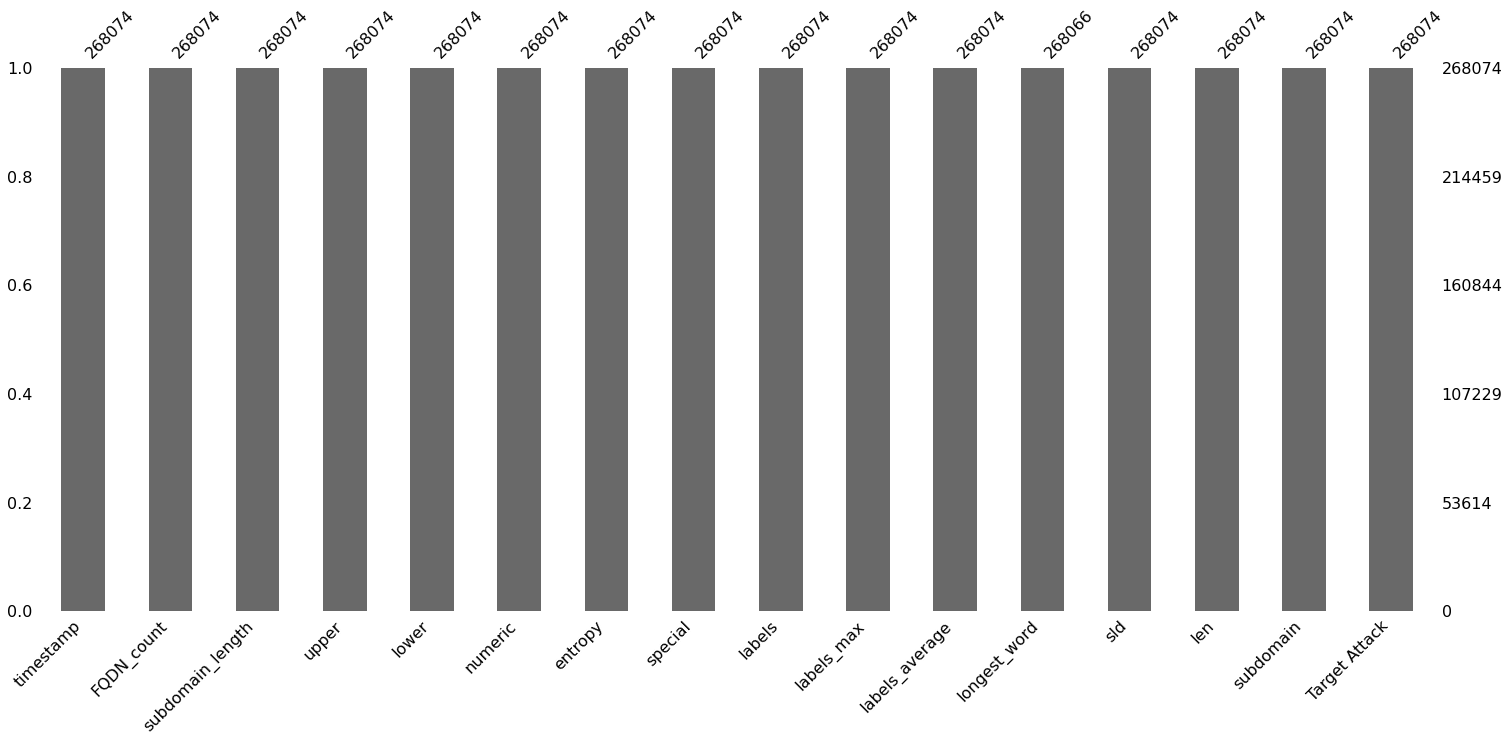

In [ ]:
msno.bar(data)

In [ ]:
# before removing the null values
len(data)

268074

In [ ]:
# after removing the null values
data = data.dropna()
print(len(data))
data = data.reset_index(drop=True)

268066


##<font color='#18A558'>***Columns that contain string values***</font>
---

In [ ]:
print("the data type of each column is : ","\n\n", data.dtypes)

the data type of each column is :  

 timestamp            object
FQDN_count            int64
subdomain_length      int64
upper                 int64
lower                 int64
numeric               int64
entropy             float64
special               int64
labels                int64
labels_max            int64
labels_average      float64
longest_word         object
sld                  object
len                   int64
subdomain             int64
Target Attack         int64
dtype: object


In [ ]:
print("############################################ ", data.columns[0], " ############################################")
print("unique values is :", data.iloc[:, 0].unique(),"\n\n")

print("############################################ ", data.columns[11], " ############################################")
print("unique values is :", data.iloc[:, 11].unique(),"\n\n")

print("############################################ ", data.columns[12], " ############################################")
print("unique values is :", data.iloc[:, 12].unique(),"\n\n")

############################################  timestamp  ############################################
unique values is : ['56:19.8' '07:23.9' '23:15.1' ... '31:45.8' '51:38.3' '00:40.7'] 


############################################  longest_word  ############################################
unique values is : ['2' 'local' 'pforzheim' ... 'match' 'pantheon' 'sizer'] 


############################################  sld  ############################################
unique values is : ['192' 'local' 'pforzheim-bisons' ... 'telia' 'boomstream' 'e2ma'] 




In [ ]:
# since i will not use time series model i will drop the timestamp column
data = data.iloc[:, 1:]

In [ ]:
data.head(5)

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


##<font color='#18A558'>***Hashing string columns***</font>
---

In [ ]:
data['longest_word'] = data['longest_word'].astype(str)
data['sld'] = data['sld'].astype(str)

In [ ]:
print("the length of unique elements in", data.columns[10],"column is :",len(data['longest_word'].unique()))
print(data['longest_word'].unique())

the length of unique elements in longest_word column is : 6224
['2' 'local' 'pforzheim' ... 'match' 'pantheon' 'sizer']


In [ ]:
print("the length of unique elements in", data.columns[11],"column is :",len(data['sld'].unique()))
print(data['sld'].unique())

the length of unique elements in sld column is : 11110
['192' 'local' 'pforzheim-bisons' ... 'telia' 'boomstream' 'e2ma']


In [ ]:
data['longest_word_hash'] = data['longest_word'].apply(
    lambda variable: 
        hashlib.md5(variable.encode()).hexdigest()
)

data['sld_hash'] = data['sld'].apply(
    lambda variable:
        hashlib.md5(variable.encode()).hexdigest()
)

In [ ]:
data['longest_word_hash'] = data['longest_word_hash'].apply(
    lambda variable: 
        int(variable, base=16)
)

data['sld_hash'] = data['sld_hash'].apply(
    lambda variable: 
        int(variable, base=16)
)

data['longest_word_hash'] = data['longest_word_hash'].astype(float)
data['sld_hash'] = data['sld_hash'].astype(float)

data = data.drop(['longest_word', 'sld'], axis=1)

In [ ]:
data.dtypes

FQDN_count             int64
subdomain_length       int64
upper                  int64
lower                  int64
numeric                int64
entropy              float64
special                int64
labels                 int64
labels_max             int64
labels_average       float64
len                    int64
subdomain              int64
Target Attack          int64
longest_word_hash    float64
sld_hash             float64
dtype: object

In [ ]:
print(data['longest_word_hash'][0])
print(data['sld_hash'][0])

2.660036914772862e+38
1.1781833566796777e+38


#<font color='#71fff1'>***Feature Filtering/Selection***</font>
---

##<font color='#18A558'>***X and Y***</font>
---

In [ ]:
y = data.iloc[:, [12]]
x = data.drop(['Target Attack'], axis=1)

y = y.to_numpy().ravel()
x = x.to_numpy()

In [ ]:
x.shape

(268066, 14)

In [ ]:
y.shape

(268066,)

In [ ]:
all_methods = []

##<font color='#18A558'>***First method: Fast ICA***</font>
---

In [ ]:
accuraciesICA = []
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=42)

for i in range(2,14):
  ICA_obj = FastICA(n_components=i)
  x_ICA = ICA_obj.fit_transform(x)
  model = ltb.LGBMClassifier()
  scores = cross_val_score(model, x_ICA, y, scoring='accuracy', cv=cv)
  accuraciesICA.append(max(scores))
  print(max(scores))

all_methods.append(accuraciesICA)

0.8291491028462715
0.8291864065356064
0.8291864065356064
0.8290371917782668
0.8292237102249412
0.829298317603611
0.8291491028462715
0.829298317603611
0.829298317603611
0.829298317603611
0.829298317603611
0.829298317603611


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

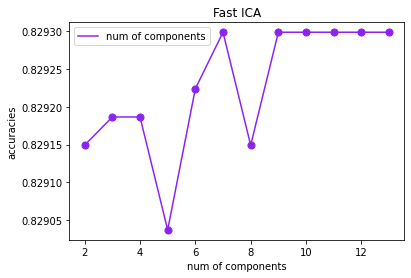

In [ ]:
Plot([2,3,4,5,6,7,8,9,10,11,12,13],accuraciesICA,"num of components", "#8b24f1", "o", 50, "num of components", "accuracies", "Fast ICA")

##<font color='#18A558'>***Second method: PCA***</font>
---

In [ ]:
accuraciesPCA = []
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=42)

for i in range(2,14):
  PCA_obj = PCA(n_components=i)
  x_PCA = PCA_obj.fit_transform(x)
  model = ltb.LGBMClassifier()
  scores = cross_val_score(model, x_PCA, y, scoring='accuracy', cv=cv)
  accuraciesPCA.append(max(scores))
  print(max(scores))

all_methods.append(accuraciesPCA)

0.8290744954676017
0.829298317603611
0.829298317603611
0.8292610139142761
0.829298317603611
0.8292610139142761
0.8293356212929459
0.829298317603611
0.829298317603611
0.829298317603611
0.8292610139142761
0.8292610139142761


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

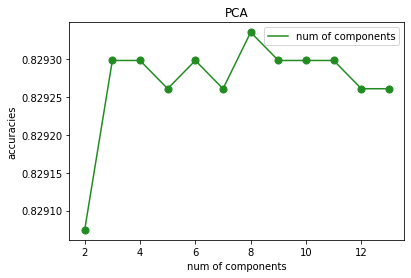

In [ ]:
Plot([2,3,4,5,6,7,8,9,10,11,12,13],accuraciesPCA,"num of components", "#228C22", "o", 50, "num of components", "accuracies", "PCA")

##<font color='#18A558'>***Third method: ANOVA***</font>
---

In [ ]:
accuraciesANOVA = []
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=42)

for i in range(2,14):
  ANOVA_obj = SelectKBest(f_classif, k=i)
  x_ANOVA = ANOVA_obj.fit_transform(x,y)
  model = ltb.LGBMClassifier()
  scores = cross_val_score(model, x_ANOVA, y, scoring='accuracy', cv=cv)
  accuraciesANOVA.append(max(scores))
  print(max(scores))

all_methods.append(accuraciesANOVA)

0.8251949117767747
0.827209311000858
0.8288133696422576
0.8290371917782668
0.8290371917782668
0.8292610139142761
0.829298317603611
0.8292610139142761
0.8292610139142761
0.8292610139142761
0.8292610139142761
0.8292610139142761


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

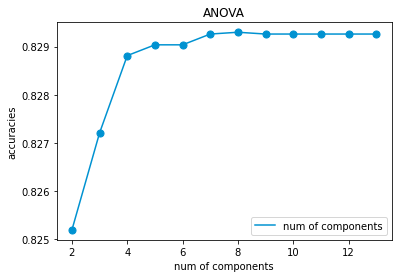

In [ ]:
Plot([2,3,4,5,6,7,8,9,10,11,12,13],accuraciesANOVA,"num of components", "#0092D1", "o", 50, "num of components", "accuracies", "ANOVA")

##<font color='#18A558'>***Fourth method: Matual Information***</font>
---

In [ ]:
features_info = mutual_info_classif(x, y)
features_info = pd.Series(features_info)
features_info.index = data.drop(['Target Attack'], axis=1).columns
features_info = features_info.sort_values(ascending=False)
features_info

longest_word_hash    0.299034
sld_hash             0.296607
labels               0.292498
special              0.286805
entropy              0.267049
FQDN_count           0.260953
lower                0.254751
labels_average       0.244861
labels_max           0.236449
subdomain_length     0.228113
numeric              0.222209
len                  0.160965
subdomain            0.158543
upper                0.003048
dtype: float64

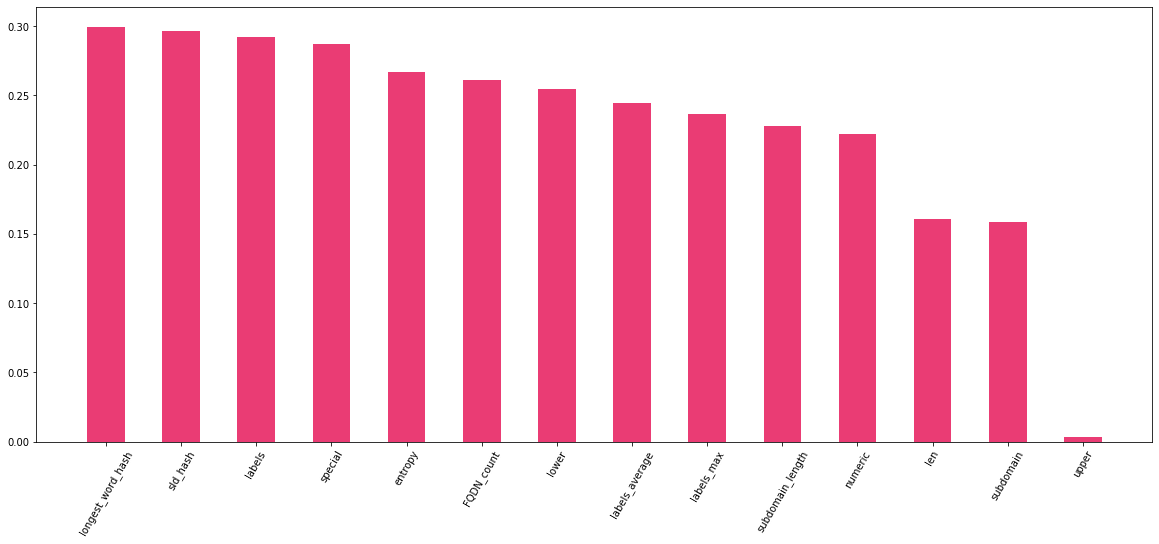

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation = 60)
plt.bar(features_info.index, features_info , width=0.5, color = "#EA3C74")
plt.show()

In [ ]:
accuraciesINFO = []
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=42)

for i in range(2,14):
  INFO_obj = SelectKBest(mutual_info_classif, k=i)
  x_INFO = INFO_obj.fit_transform(x,y)
  model = ltb.LGBMClassifier()
  scores = cross_val_score(model, x_INFO, y, scoring='accuracy', cv=cv)
  accuraciesINFO.append(max(scores))
  print(max(scores))

all_methods.append(accuraciesINFO)

0.8292610139142761
0.8292610139142761
0.829298317603611
0.8293356212929459
0.8292610139142761
0.8293356212929459
0.829298317603611
0.829298317603611
0.829298317603611
0.829298317603611
0.8292610139142761
0.8292610139142761


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

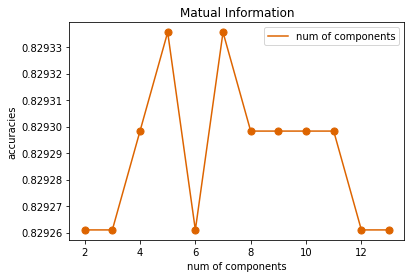

In [ ]:
Plot([2,3,4,5,6,7,8,9,10,11,12,13],accuraciesINFO,"num of components", "#DD6400", "o", 50, "num of components", "accuracies", "Matual Information")

##<font color='#18A558'>***Comparison between the four methods***</font>
---

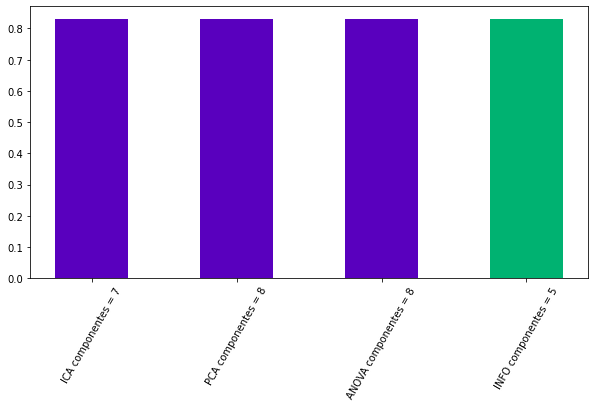

the highest accuracy is  0.8293356212929459


In [ ]:
max_accuracies = []
num_of_components = []

for i in range(4):
  max_accuracies.append(max(all_methods[i]))
  num_of_components.append(all_methods[i].index(max(all_methods[i]))+2)

ICA = "ICA componentes = " + str(num_of_components[0])
PCA = "PCA componentes = " + str(num_of_components[1])
ANOVA = "ANOVA componentes = " + str(num_of_components[2])
INFO = "INFO componentes = " + str(num_of_components[3])

methods = [ICA,PCA,ANOVA,INFO]

plt.figure(figsize=(10,5))
plt.xticks(rotation = 60)
plt.bar(methods, max_accuracies ,width=0.5, color = "#5900BE")
plt.bar(methods[3], max(max_accuracies) ,width=0.5, color = "#00B271")
plt.show()
print("the highest accuracy is ", max(max_accuracies))

##<font color='#18A558'>***Apply the best method from feature selection***</font>
---

In [ ]:
INFO_obj = SelectKBest(mutual_info_classif, k=5)
new_x = INFO_obj.fit_transform(x,y)

#<font color='#71fff1'>***Model Training***</font>
---

##<font color='#18A558'>***Spliting the data***</font>
---

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.20, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

##<font color='#18A558'>***Transformation***</font>
---

In [ ]:
# type(x_val)

numpy.ndarray

In [ ]:
# x_val

array([[2.74233762e+00, 6.00000000e+00, 6.00000000e+00, 2.66003691e+38,
        1.17818336e+38],
       [1.85754248e+00, 1.00000000e+00, 2.00000000e+00, 3.15252170e+38,
        3.00223709e+38],
       [2.55664167e+00, 6.00000000e+00, 6.00000000e+00, 2.66003691e+38,
        1.17818336e+38],
       ...,
       [2.06716806e+00, 2.00000000e+00, 3.00000000e+00, 2.33988593e+38,
        2.33988593e+38],
       [2.62500000e+00, 1.00000000e+00, 2.00000000e+00, 3.14694040e+38,
        2.58274925e+38],
       [3.62500000e+00, 1.00000000e+00, 1.00000000e+00, 1.77886511e+37,
        2.45881073e+38]])

In [ ]:
# x_train = pd.DataFrame(x_train)
# x_val = pd.DataFrame(x_val)

# for column in x_val:
#   x_train[column] = np.sqrt(x_train[column])
#   x_val[column] = np.sqrt(x_val[column])

# x_train = x_train.to_numpy()
# x_val = x_val.to_numpy()

# x_val

array([[1.65600049e+00, 2.44948974e+00, 2.44948974e+00, 1.63096196e+19,
        1.08544155e+19],
       [1.36291690e+00, 1.00000000e+00, 1.41421356e+00, 1.77553420e+19,
        1.73269648e+19],
       [1.59895018e+00, 2.44948974e+00, 2.44948974e+00, 1.63096196e+19,
        1.08544155e+19],
       ...,
       [1.43776495e+00, 1.41421356e+00, 1.73205081e+00, 1.52966857e+19,
        1.52966857e+19],
       [1.62018517e+00, 1.00000000e+00, 1.41421356e+00, 1.77396178e+19,
        1.60709342e+19],
       [1.90394328e+00, 1.00000000e+00, 1.00000000e+00, 4.21765944e+18,
        1.56805954e+19]])

In [ ]:
# np.all(np.isfinite(x_train))

True

##<font color='#18A558'>***Normalizing the data***</font>
---

In [ ]:
normalizer = MinMaxScaler()
x_train = normalizer.fit_transform(x_train)
x_val = normalizer.transform(x_val)
x_test = normalizer.transform(x_test)

##<font color='#18A558'>***T-SNE***</font>
---

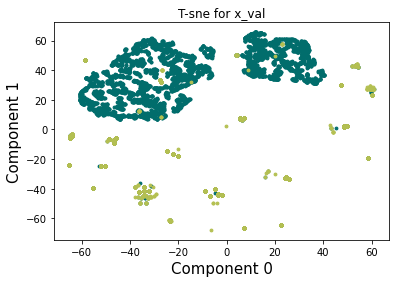

In [ ]:
colorsOptions = []
Labels = []
letters = ["0","1","2","3","4","5","6","7","8","9","a","b","c","d","e","f"]
for j in range(2):
    Labels.append(j)
    colorsOptions.append(''.join(random.choice(letters) for i in range(6)))
    colorsOptions[j] = '#' + colorsOptions[j]

tsne1 = TSNE(n_components=2).fit_transform(x_val)

tsne_features = pd.concat([pd.DataFrame(tsne1), pd.DataFrame(y_val)],axis=1 , ignore_index = True).astype(float)
listOfclasses1 = GetListOfClasses(2, tsne_features , pd.DataFrame(tsne_features).columns[2])

PlotDataPoints(2, colorsOptions, listOfclasses1, 'Component 0', 'Component 1' ,[0,1] ,8, 'T-sne for x_val').show()

##<font color='#18A558'>***First Model: Random Forest Classifier***</font>
---

In [ ]:
param_grid1 = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

model1 = RandomForestClassifier()
grid_search = GridSearchCV(estimator = model1, param_grid = param_grid1, cv = 3, scoring = "f1_macro", verbose = 1)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
grid_search.best_params_

Fitting 3 folds for each of 162 candidates, totalling 486 fits
{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

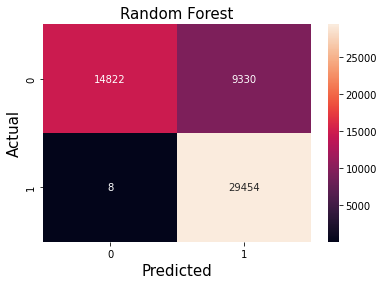

              precision    recall  f1-score   support

           0       1.00      0.61      0.76     24152
           1       0.76      1.00      0.86     29462

    accuracy                           0.83     53614
   macro avg       0.88      0.81      0.81     53614
weighted avg       0.87      0.83      0.82     53614



In [ ]:
model1 = RandomForestClassifier(bootstrap = True, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 200)
model1.fit(x_train, y_train)

y_pred1 = model1.predict(x_test)
cm1 = ConfusionMatrix(y_test, y_pred1)
PLOT_ConfusionMatrix(cm1,"Random Forest")
model1_report = classification_report(y_test, y_pred1)
print(model1_report)

##<font color='#18A558'>***Second Model: LightGbm***</font>
---

In [ ]:
param_grid2 = {'learning_rate': [0.01,0.1,1,0.001],
               'n_estimators': [8, 24],
               'num_leaves': [6, 8, 12, 16],
               'boosting_type': ['gbdt'], 
               'objective': ['binary'],
               'seed': [42],
               'colsample_bytree': [0.65, 0.75, 0.8], 
               'subsample': [0.7, 0.75],
               'reg_alpha': [1, 2, 6],
               'reg_lambda': [1, 2, 6]}

model2 = ltb.LGBMClassifier()
grid_search = GridSearchCV(estimator = model2, param_grid = param_grid2, cv = 3, scoring = "f1_macro", verbose = 1)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
grid_search.best_params_

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits
{'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 1, 'n_estimators': 24, 'num_leaves': 16, 'objective': 'binary', 'reg_alpha': 1, 'reg_lambda': 1, 'seed': 42, 'subsample': 0.7}


{'boosting_type': 'gbdt',
 'colsample_bytree': 0.8,
 'learning_rate': 1,
 'n_estimators': 24,
 'num_leaves': 16,
 'objective': 'binary',
 'reg_alpha': 1,
 'reg_lambda': 1,
 'seed': 42,
 'subsample': 0.7}

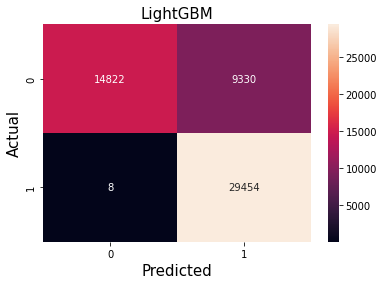

              precision    recall  f1-score   support

           0       1.00      0.61      0.76     24152
           1       0.76      1.00      0.86     29462

    accuracy                           0.83     53614
   macro avg       0.88      0.81      0.81     53614
weighted avg       0.87      0.83      0.82     53614



In [ ]:
model2 = ltb.LGBMClassifier(boosting_type = "gbdt", colsample_bytree = 0.8, learning_rate= 1, n_estimators = 24, num_leaves = 16, objective = 'binary',
                            reg_alpha= 1, reg_lambda = 1, seed = 42, subsample = 0.7)
model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test)
proba = model2.predict_proba(x_test)
cm2 = ConfusionMatrix(y_test, y_pred2)
PLOT_ConfusionMatrix(cm2,"LightGBM")
model2_report = classification_report(y_test, y_pred2)
print(model2_report)

##<font color='#18A558'>***LightGbm Thresholding***</font>
---

In [ ]:
# proba = pd.DataFrame(proba)
# proba

,0,1
0,0.236783,0.763217
1,0.999987,0.000013
2,0.223684,0.776316
3,0.236783,0.763217
4,0.215113,0.784887
...,...,...
53609,0.999984,0.000016
53610,0.215113,0.784887
53611,0.240112,0.759888
53612,0.999990,0.000010


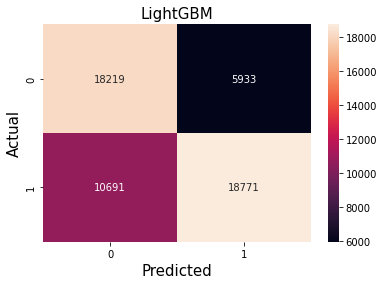

              precision    recall  f1-score   support

           0       0.63      0.75      0.69     24152
           1       0.76      0.64      0.69     29462

    accuracy                           0.69     53614
   macro avg       0.70      0.70      0.69     53614
weighted avg       0.70      0.69      0.69     53614



In [ ]:
# Thresholding = []
# for i in range(len(proba)):
#   if proba.iloc[i,0].astype(float) >= 0.2410:
#     Thresholding.append(0)
#   else:
#     Thresholding.append(1)
  
# Thresh_holding = np.asarray(Thresholding)
# len(Thresholding)
# cm2 = ConfusionMatrix(y_test, Thresholding)
# PLOT_ConfusionMatrix(cm2,"LightGBM")
# model2_report = classification_report(y_test, Thresholding)
# print(model2_report)

#<font color='#71fff1'>***Model Evaluation***</font>
---

##<font color='#18A558'>***First Model: Random Forest Classifier***</font>
---

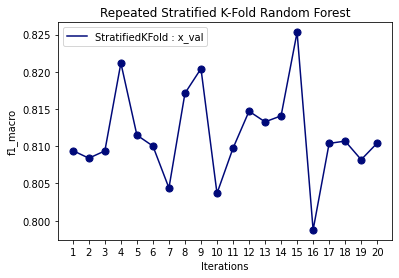

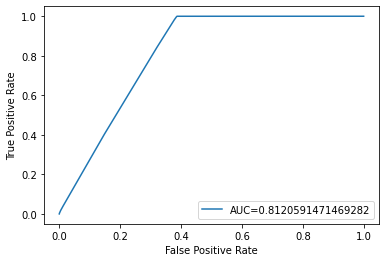

In [ ]:
model1 = RandomForestClassifier(bootstrap = True, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 200)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=42)
scoresRF = cross_val_score(model1, x_test, y_test, scoring='f1_macro', cv=cv)
iterations = list(range(1, 21))
Plot(iterations,scoresRF,"StratifiedKFold : x_val", "#000979", "o", 50, "Iterations", "f1_macro", "Repeated Stratified K-Fold Random Forest")
plt.xticks(iterations)
plt.show()

model1 = RandomForestClassifier(bootstrap = True, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 200)
model1.fit(x_test, y_test)
y_pred_proba = model1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##<font color='#18A558'>***Second Model: LightGbm***</font>
---

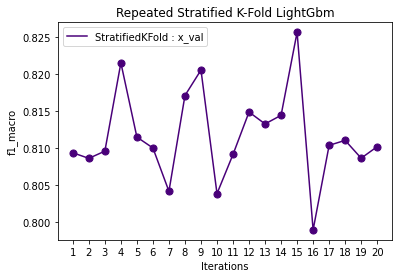

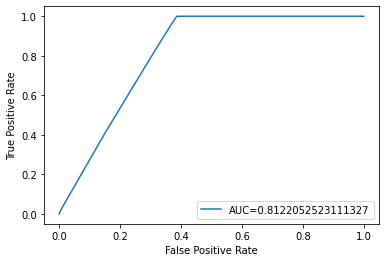

In [ ]:
model2 = ltb.LGBMClassifier(boosting_type = "gbdt", colsample_bytree = 0.8, learning_rate= 1, n_estimators = 24, num_leaves = 16, objective = 'binary',
                            reg_alpha= 1, reg_lambda = 1, seed = 42, subsample = 0.7)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=42)
scoresLgb = cross_val_score(model2, x_test, y_test, scoring='f1_macro', cv=cv)
iterations = list(range(1, 21))
Plot(iterations,scoresLgb,"StratifiedKFold : x_val", "#490079", "o", 50, "Iterations", "f1_macro", "Repeated Stratified K-Fold LightGbm")
plt.xticks(iterations)
plt.show()

model2 = ltb.LGBMClassifier(boosting_type = "gbdt", colsample_bytree = 0.8, learning_rate= 1, n_estimators = 24, num_leaves = 16, objective = 'binary',
                            reg_alpha= 1, reg_lambda = 1, seed = 42, subsample = 0.7)
model2.fit(x_test, y_test)
y_pred_proba2 = model2.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba2)
auc = metrics.roc_auc_score(y_test, y_pred_proba2)

# create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##<font color='#18A558'>***Save The Champion model (LightGBM)***</font>
---

In [ ]:
import pickle

model2 = ltb.LGBMClassifier(boosting_type = "gbdt", colsample_bytree = 0.8, learning_rate= 1, n_estimators = 24, num_leaves = 16, objective = 'binary',
                            reg_alpha= 1, reg_lambda = 1, seed = 42, subsample = 0.7)
model2 = model2.fit(x_train, y_train)

filename = 'Champion_Model.pkl'
pickle.dump(model2, open(filename, 'wb'))